# Kodekladd

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (
    PolynomialFeatures,
)
from functions import runge, MSE, R2, Ridge_parameters, OLS_parameters

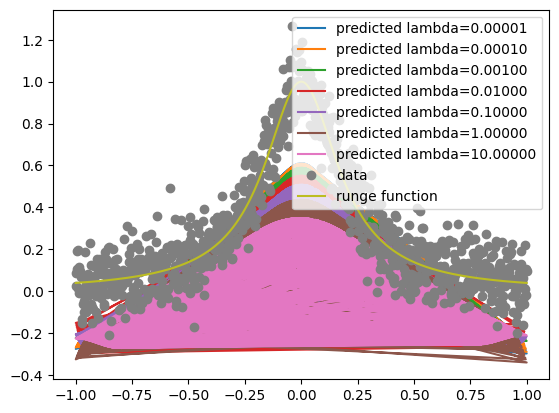

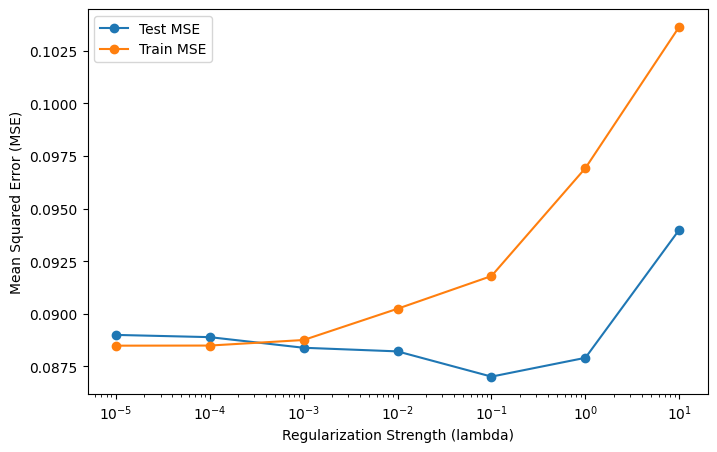

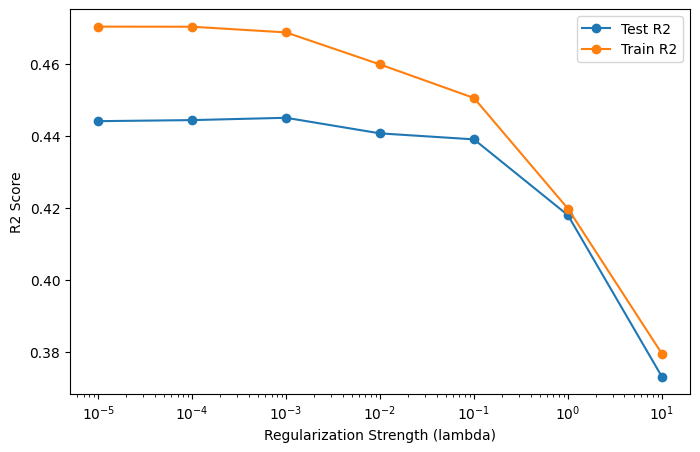

In [2]:
#Analysis fixed number of data points and polynomial degree, varying lambda

n = 1000

np.random.seed(42)

x = np.linspace(-1,1, n).reshape(-1,1)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=10)
scaler = StandardScaler()
X_train = poly.fit_transform(x_train)
X_test = poly.fit_transform(x_test)
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

lambdas = np.logspace(-5,1,7)

mse_test_list = []
mse_train_list = []

r2_test_list = []
r2_train_list = []

theta = []

for l in lambdas:
    beta = Ridge_parameters(X_train_s, y_train, l)
    theta.append(beta)
    y_test_tilde = X_test_s @ beta
    y_train_tilde = X_train_s @ beta
    plt.plot(x_train, y_train_tilde, label=f'predicted lambda={l:.5f}')

    mse_test = MSE(y_test, y_test_tilde)
    mse_train = MSE(y_train, y_train_tilde)
    mse_test_list.append(mse_test)
    mse_train_list.append(mse_train)

    r2_test = R2(y_test, y_test_tilde)
    r2_train = R2(y_train, y_train_tilde)
    r2_test_list.append(r2_test)
    r2_train_list.append(r2_train)

plt.plot(x, y, 'o', label='data')
plt.plot(x, runge(x), label='runge function')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(lambdas, mse_test_list, label='Test MSE', marker='o')
plt.plot(lambdas, mse_train_list, label='Train MSE', marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (lambda)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(lambdas, r2_test_list, label='Test R2', marker='o')
plt.plot(lambdas, r2_train_list, label='Train R2', marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (lambda)')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

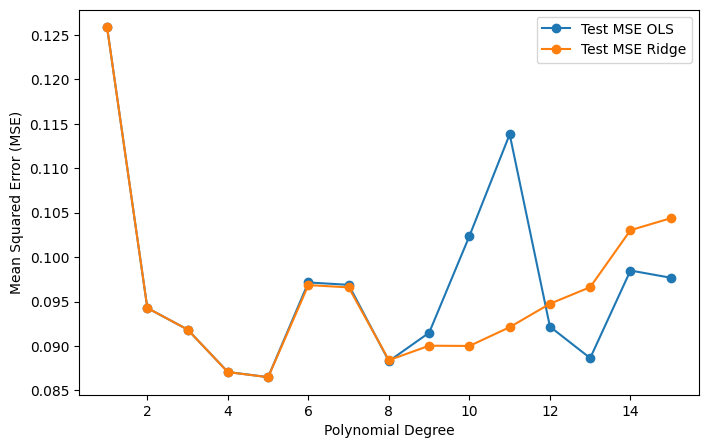

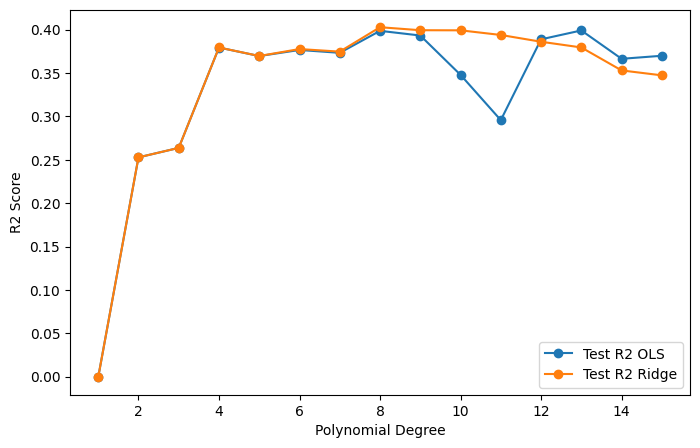

In [4]:
#Comparison of R2 for OLS and Ridge regression

n = 100

np.random.seed(42)

x = np.linspace(-1,1, n).reshape(-1,1)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
degrees = range(1,16)

mse_test_ridge = []
mse_test_ols = []

r2_test_ridge = []
r2_test_ols = []


for p in degrees:
    poly = PolynomialFeatures(degree=p)
    scaler = StandardScaler()
    X_train = poly.fit_transform(x_train)
    X_test = poly.fit_transform(x_test)
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    beta_ols = OLS_parameters(X_train_s, y_train)
    beta_ridge = Ridge_parameters(X_train_s, y_train, 0.001)
    y_ols_tilde = X_test_s @ beta_ols
    y_ridge_tilde = X_test_s @ beta_ridge

    mse_ols = MSE(y_test, y_ols_tilde)
    mse_ridge = MSE(y_test, y_ridge_tilde)
    mse_test_ols.append(mse_ols)
    mse_test_ridge.append(mse_ridge)

    r2_ols = R2(y_test, y_ols_tilde)
    r2_ridge = R2(y_test, y_ridge_tilde)
    r2_test_ols.append(r2_ols)
    r2_test_ridge.append(r2_ridge)


plt.figure(figsize=(8, 5))
plt.plot(degrees, mse_test_ols, label='Test MSE OLS', marker='o')
plt.plot(degrees, mse_test_ridge, label='Test MSE Ridge', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(degrees, r2_test_ols, label='Test R2 OLS', marker='o')
plt.plot(degrees, r2_test_ridge, label='Test R2 Ridge', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.legend()
plt.show()